In [1]:
import os, sys
import torch

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1


if dir1 not in sys.path: sys.path.append(dir0)

import os, sys
import torch

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1


if dir1 not in sys.path: sys.path.append(dir0)

from src.config import PPOConfig, EmbeddingStrategy
from src.experiments import ExperimentSuite
from src.utils import ExperimentUtils


def mean_vs_max(strategy, file_name):
    url = "saved_experiments" + "/" + file_name
    base_config_balance_5_agents = PPOConfig(
        n_agents=5, scenario_name='balance', strategy=strategy, pooling_method='mean', use_strategy_defaults=True,
    )

    param_grid = {
        "pooling_method": ['mean', 'max']
    }
    my_device = torch.device("cpu")
    suite = ExperimentSuite(base_config=base_config_balance_5_agents, param_grid=param_grid, name="test_all", device=my_device)
    suite.run_all_confidence(k=10)

    suite_utils = ExperimentUtils(path=url, experiment_suite=suite)
    suite_utils.save_df_to_file()
    suite_utils.plot_experiment_suite_df()
    print(suite_utils.create_table_with_confidence())



In [2]:
mean_vs_max(strategy=EmbeddingStrategy.MLP, file_name='mean_v_max_mlps.csv')

2025-08-18 12:36:27,629 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 12:36:27,834 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 0:   0%|          | 0/80 [00:00<?, ?it/s]

KeyboardInterrupt: 

2025-08-14 17:21:52,711 [torchrl][INFO] check_env_specs succeeded!
2025-08-14 17:21:52,761 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 99.97540283203125: 100%|██████████| 80/80 [02:12<00:00,  1.65s/it] 
2025-08-14 17:24:04,936 [torchrl][INFO] Training time: 59.13 seconds
2025-08-14 17:24:04,941 [torchrl][INFO] macs: 41.73 MMac  Params: 20.86 k
2025-08-14 17:24:05,963 [torchrl][INFO] check_env_specs succeeded!
2025-08-14 17:24:06,006 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 91.39429473876953: 100%|██████████| 80/80 [02:15<00:00,  1.69s/it] 
2025-08-14 17:26:21,014 [torchrl][INFO] Training time: 60.86 seconds
2025-08-14 17:26:21,019 [torchrl][INFO] macs: 41.73 MMac  Params: 20.86 k
2025-08-14 17:26:22,033 [torchrl][INFO] check_env_specs succeeded!
2025-08-14 17:26:22,074 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 102.81096649169922: 100%|██████████| 80/80 [02:17<00:00,  1.72s/it] 
2025-08-14 17:28:39,394 [torchrl][INFO] T

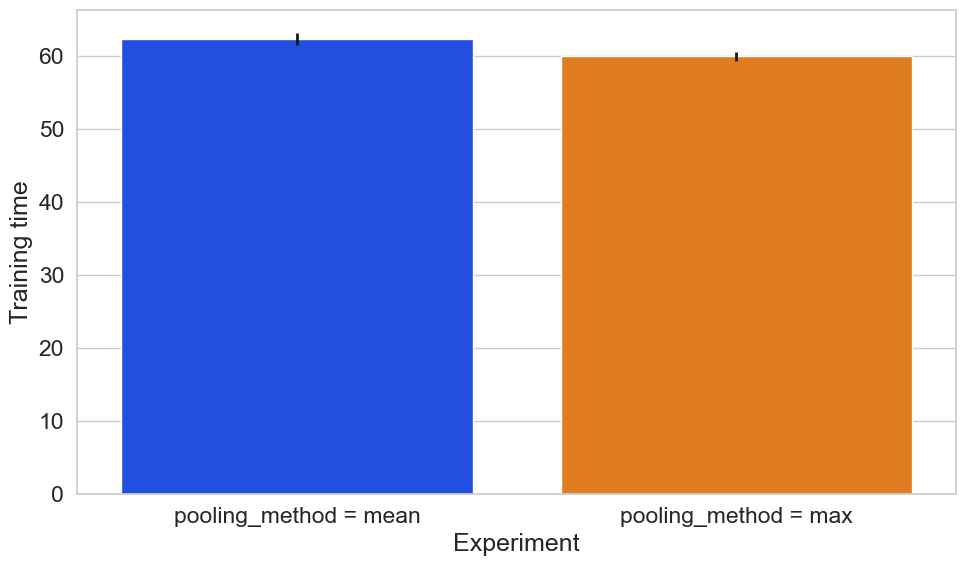

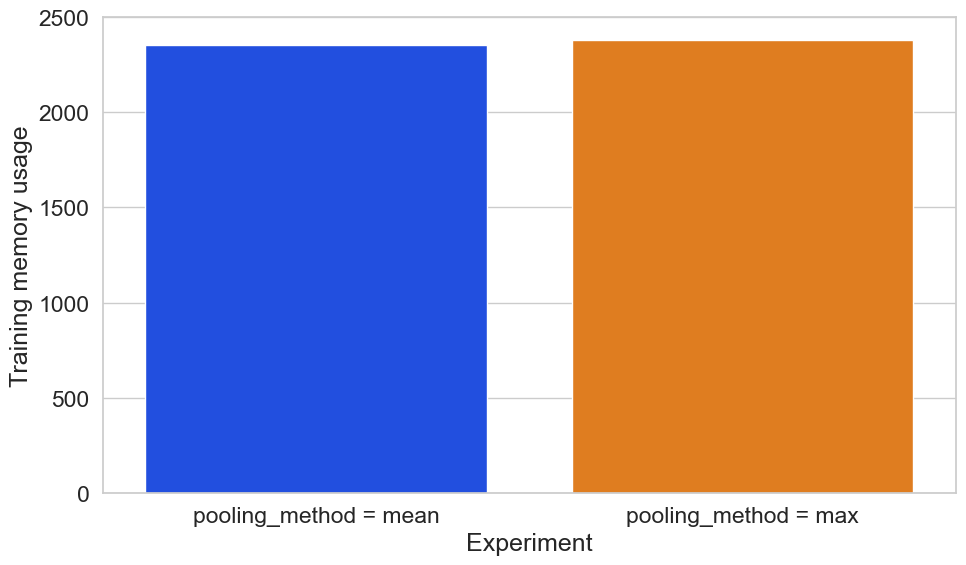

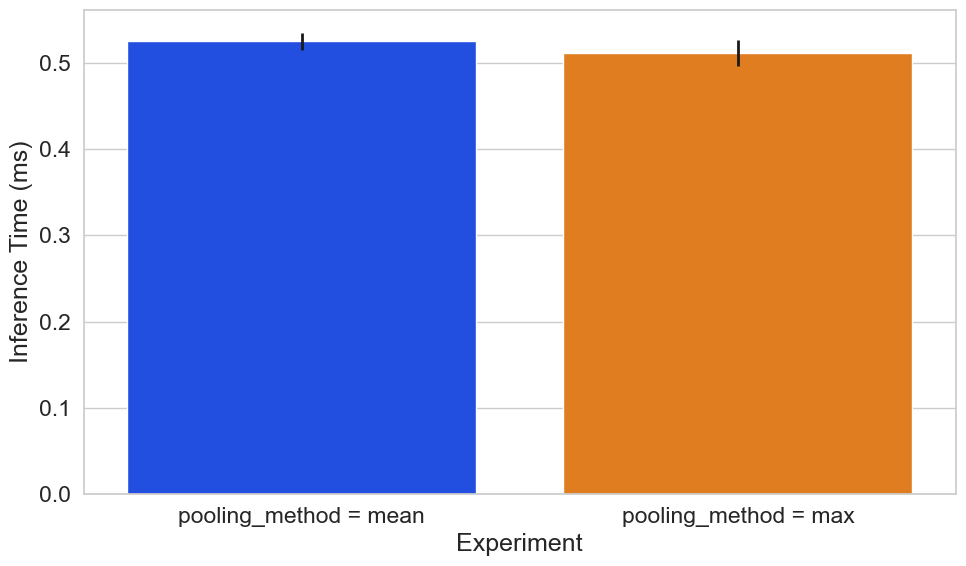

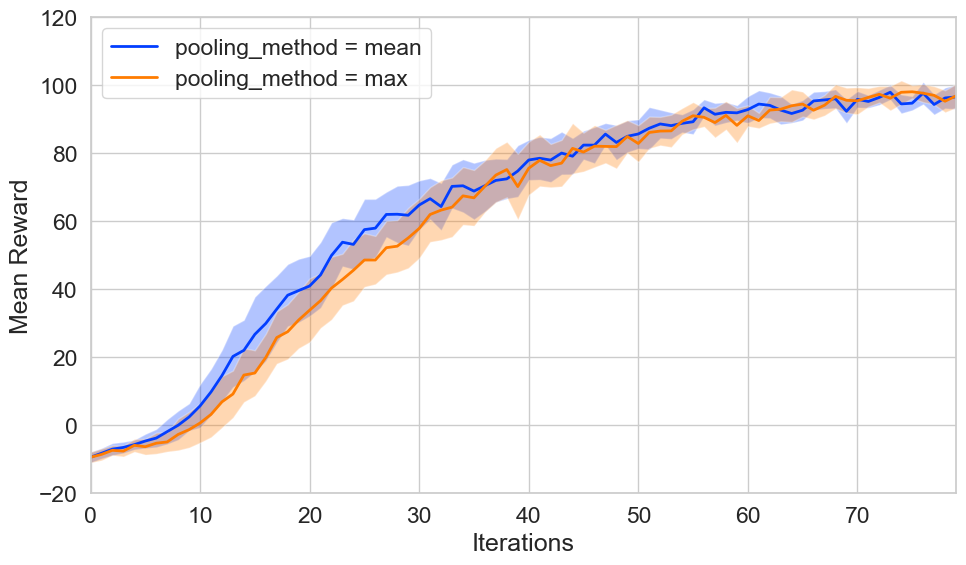

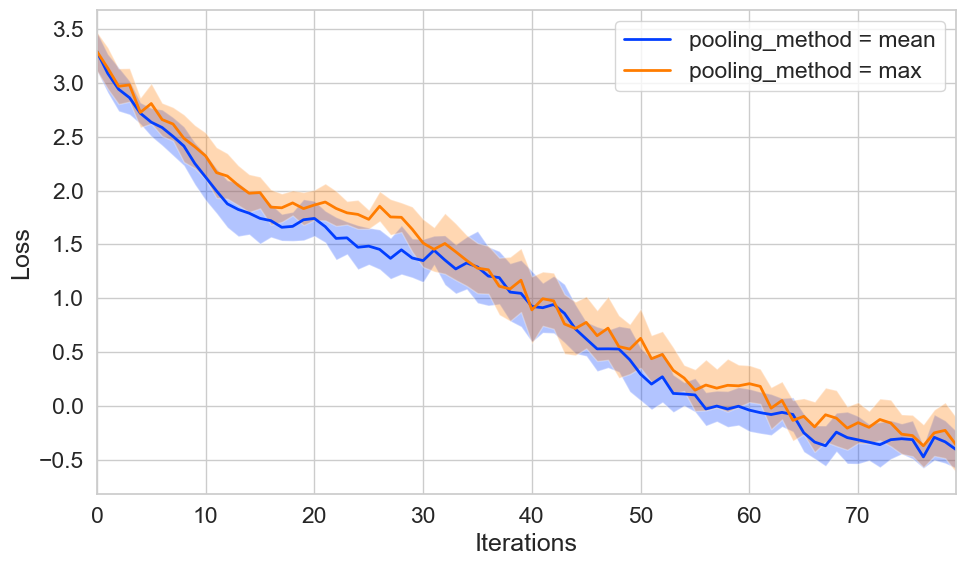

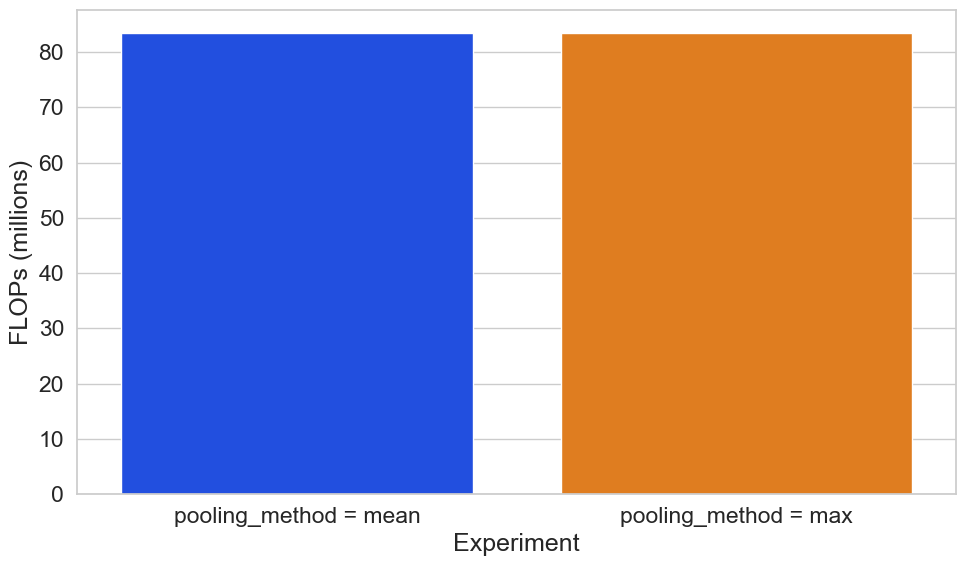

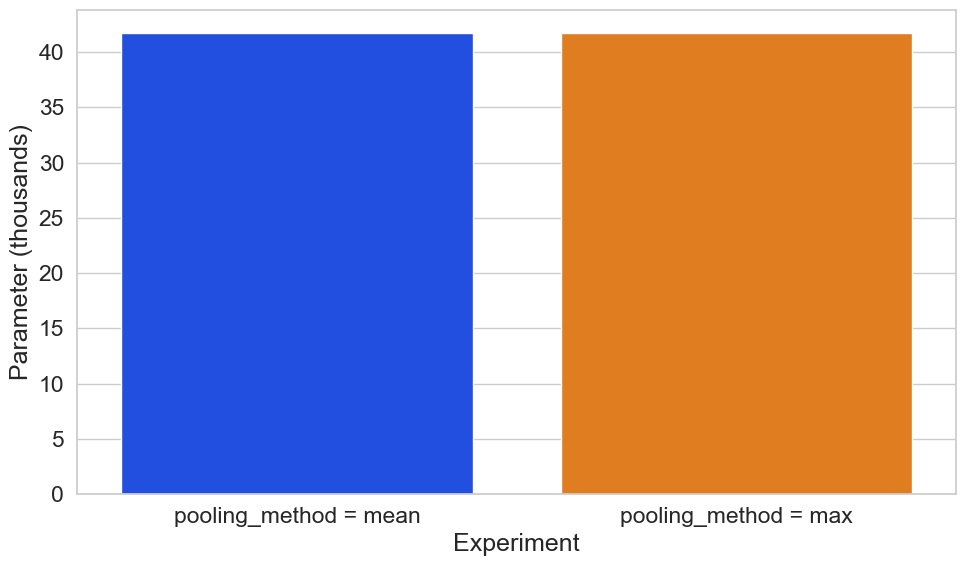

              Experiment training_time training_memory_usage  \
0  pooling_method = mean  62.39 ± 0.79    2352.12 ± 0.00e+00   
1   pooling_method = max  60.02 ± 0.62    2381.08 ± 0.00e+00   

        inference_time  mean_rewards          loss             flops  \
0  5.25e-04 ± 9.64e-06  96.51 ± 3.57  -0.40 ± 0.17  83.46 ± 8.68e-15   
1  5.11e-04 ± 1.53e-05  96.82 ± 3.47  -0.36 ± 0.26  83.46 ± 8.68e-15   

         parameters  
0  41.72 ± 4.34e-15  
1  41.72 ± 4.34e-15  


In [3]:
mean_vs_max(strategy=EmbeddingStrategy.MLP_LOCAL, file_name='mean_v_max_mlp_local.csv')

2025-08-14 18:08:24,881 [torchrl][INFO] check_env_specs succeeded!
2025-08-14 18:08:24,925 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 91.94509887695312: 100%|██████████| 80/80 [03:03<00:00,  2.30s/it]  
2025-08-14 18:11:28,552 [torchrl][INFO] Training time: 106.79 seconds
2025-08-14 18:11:28,557 [torchrl][INFO] macs: 150.63 MMac  Params: 75.31 k
2025-08-14 18:11:29,670 [torchrl][INFO] check_env_specs succeeded!
2025-08-14 18:11:29,712 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 100.22589874267578: 100%|██████████| 80/80 [03:10<00:00,  2.38s/it]
2025-08-14 18:14:40,168 [torchrl][INFO] Training time: 112.99 seconds
2025-08-14 18:14:40,174 [torchrl][INFO] macs: 150.63 MMac  Params: 75.31 k
2025-08-14 18:14:41,244 [torchrl][INFO] check_env_specs succeeded!
2025-08-14 18:14:41,287 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 102.58009338378906: 100%|██████████| 80/80 [03:13<00:00,  2.42s/it]
2025-08-14 18:17:54,990 [torchrl][INF

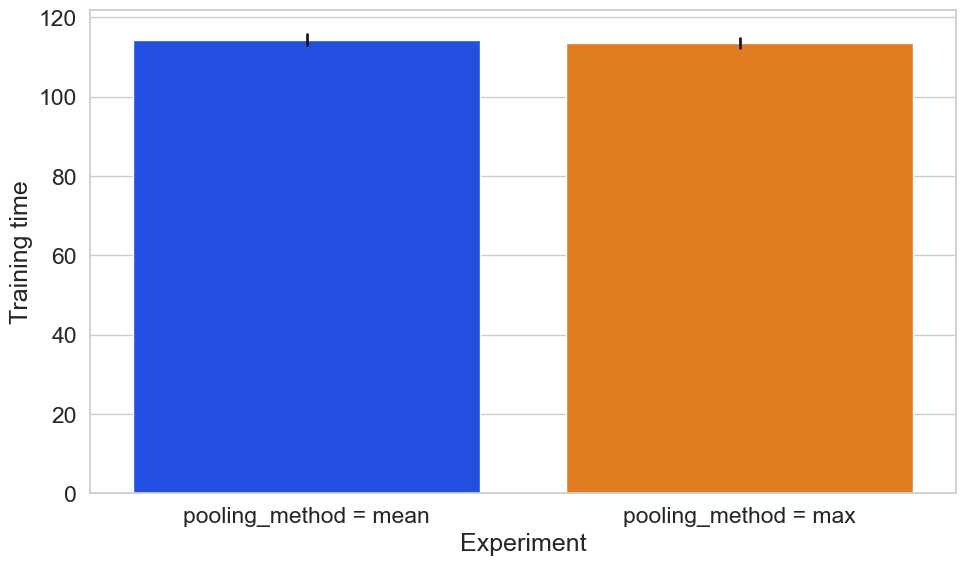

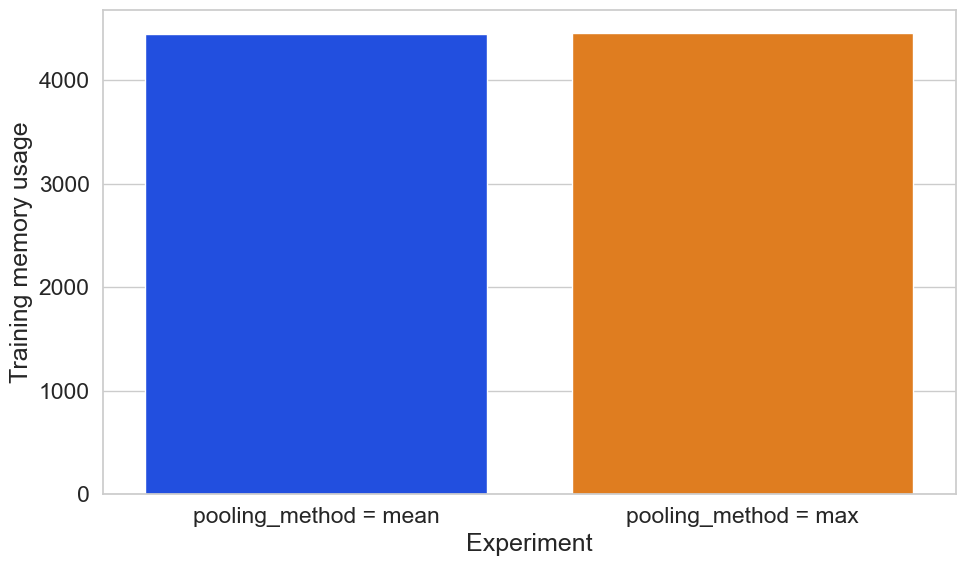

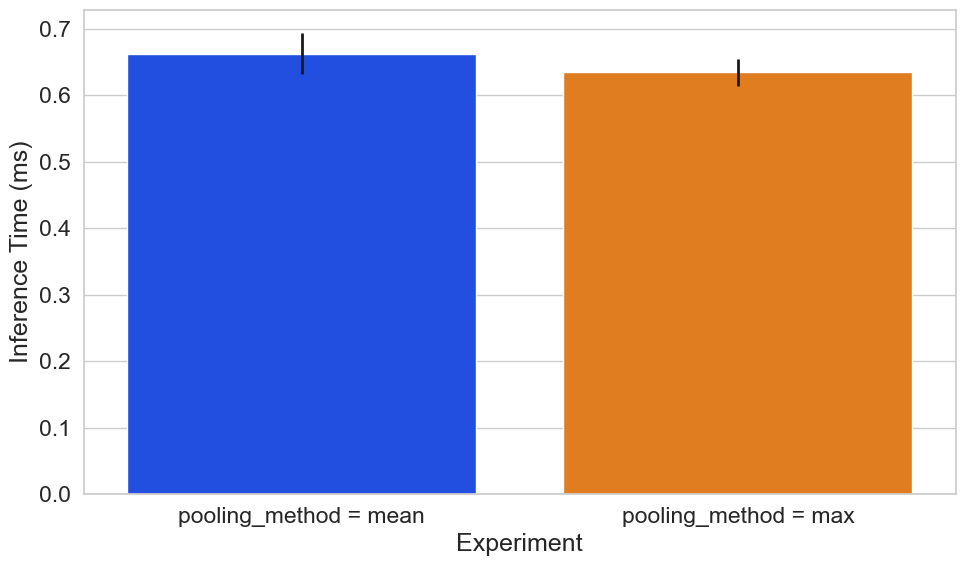

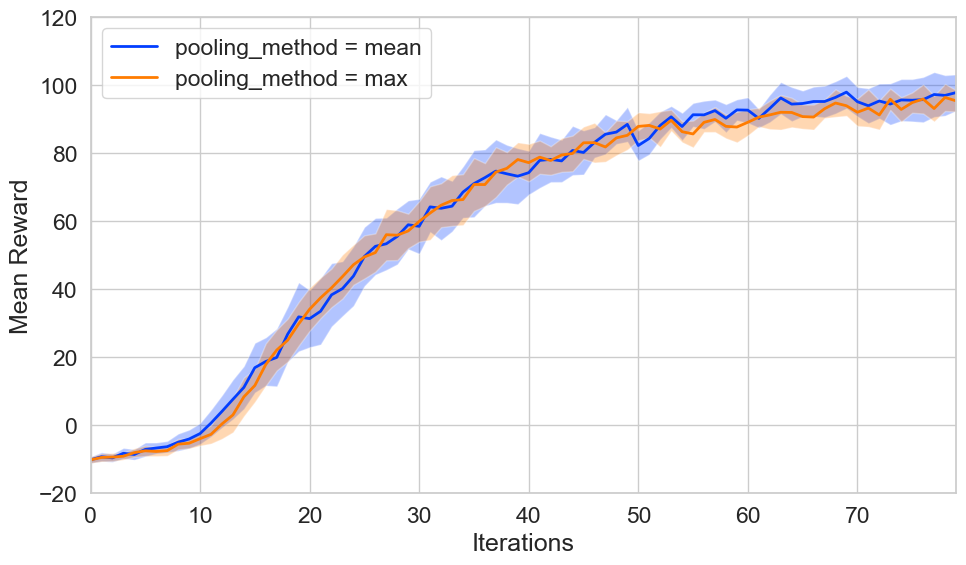

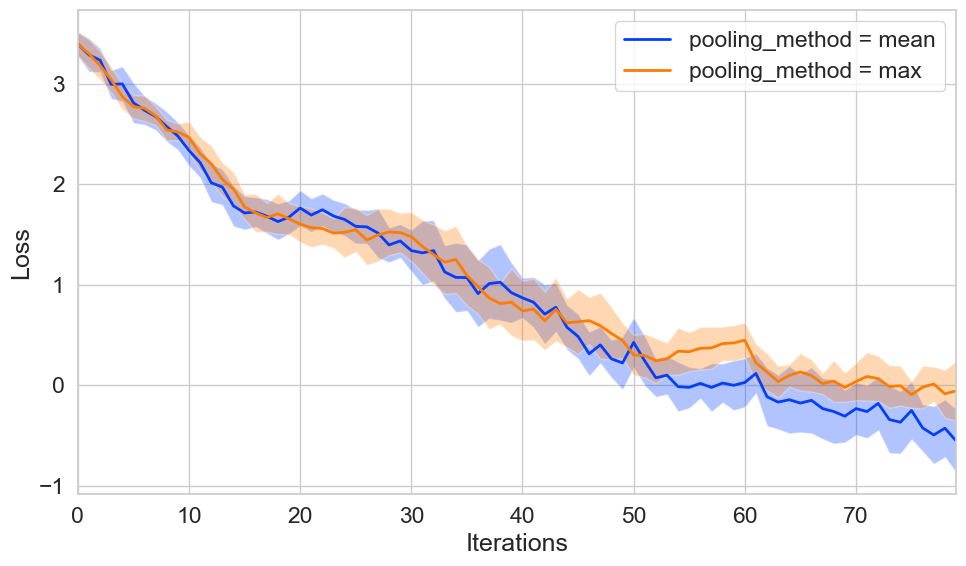

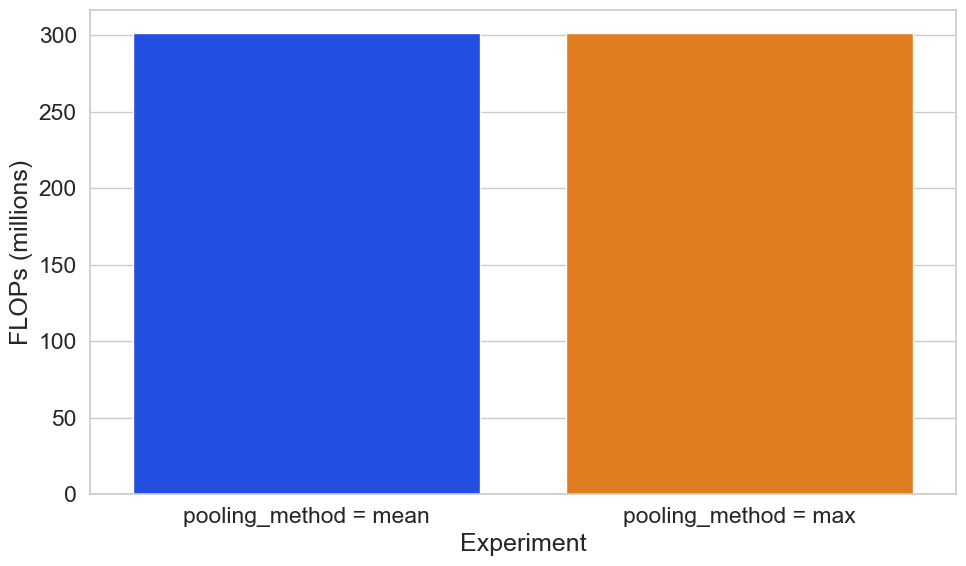

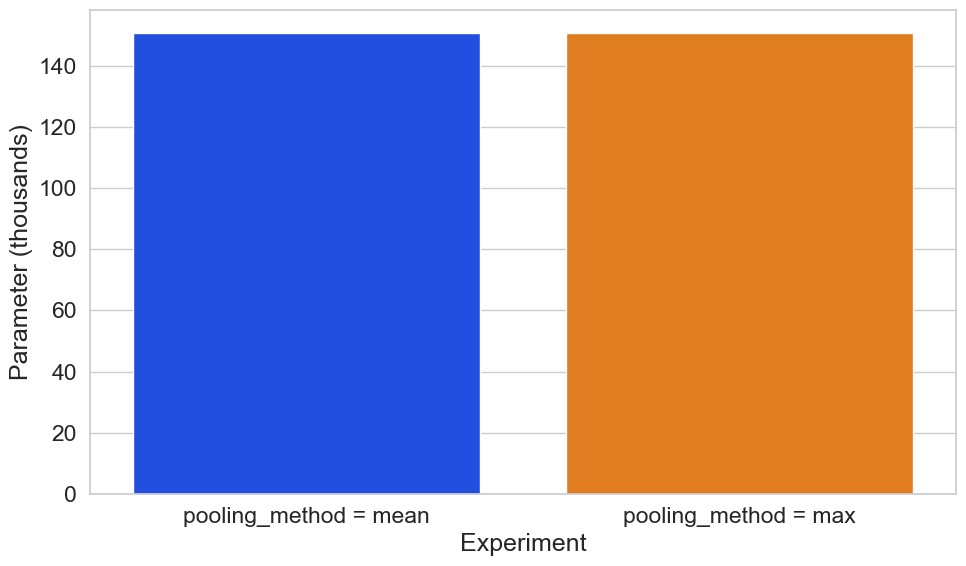

              Experiment  training_time training_memory_usage  \
0  pooling_method = mean  114.34 ± 1.69    4452.36 ± 0.00e+00   
1   pooling_method = max  113.53 ± 1.56    4458.36 ± 0.00e+00   

        inference_time  mean_rewards          loss              flops  \
0  6.63e-04 ± 3.09e-05  97.78 ± 5.33  -0.55 ± 0.31  301.26 ± 3.47e-14   
1  6.35e-04 ± 2.01e-05  95.37 ± 3.14  -0.05 ± 0.30  301.26 ± 3.47e-14   

          parameters  
0  150.62 ± 1.74e-14  
1  150.62 ± 1.74e-14  


In [4]:
mean_vs_max(strategy=EmbeddingStrategy.MLP_GLOBAL, file_name='mean_v_max_mlp_global.csv')

2025-08-14 19:13:49,855 [torchrl][INFO] check_env_specs succeeded!
2025-08-14 19:13:49,921 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 0:   0%|          | 0/80 [00:00<?, ?it/s]/opt/miniconda3/envs/ma_rl/lib/python3.9/site-packages/torch_geometric/utils/_scatter.py:79: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::scatter_add_. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/functorch/BatchedFallback.cpp:84.)
  count.scatter_add_(0, index, src.new_ones(src.size(dim)))
/opt/miniconda3/envs/ma_rl/lib/python3.9/site-packages/torch_geometric/utils/_scatter.py:83: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::scatter_add_. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at /Users/runner/wor

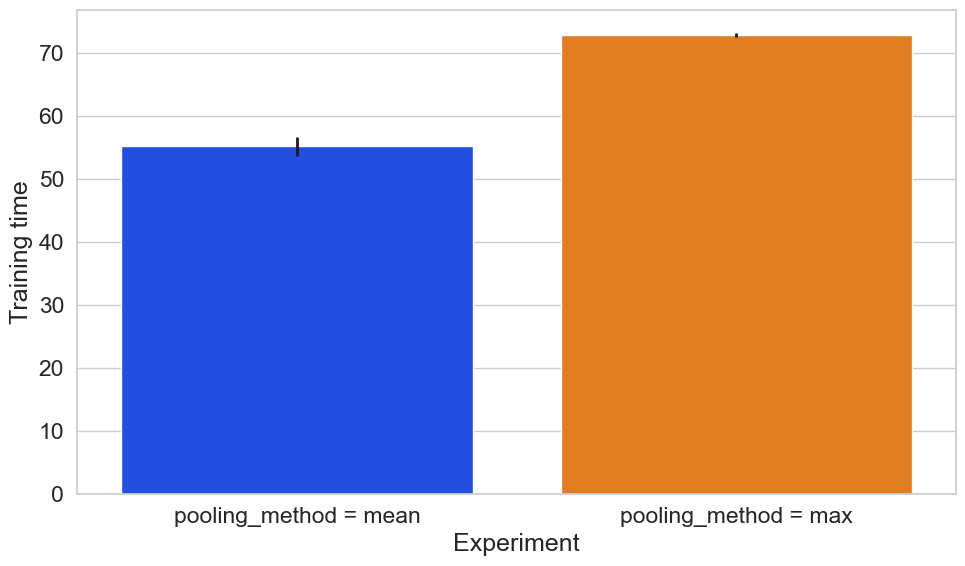

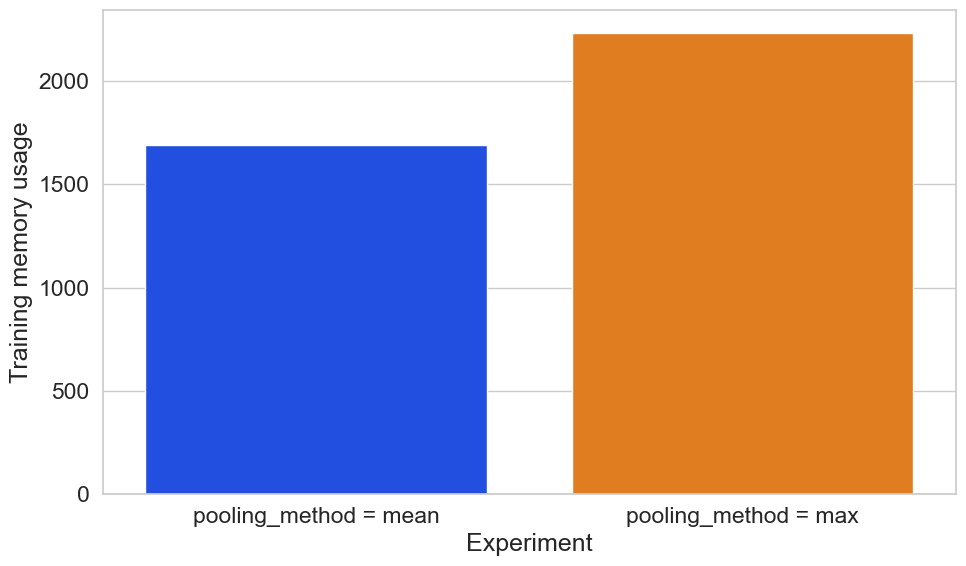

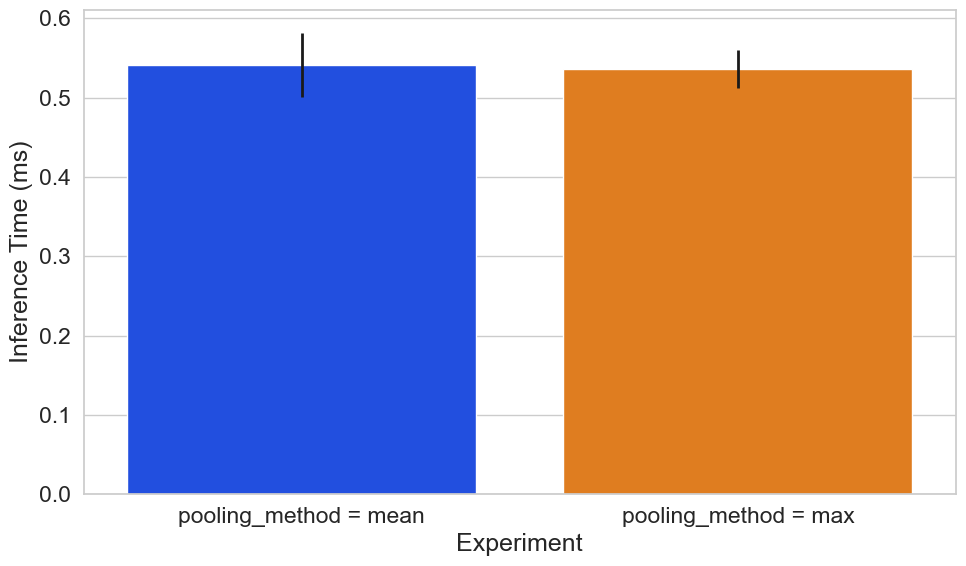

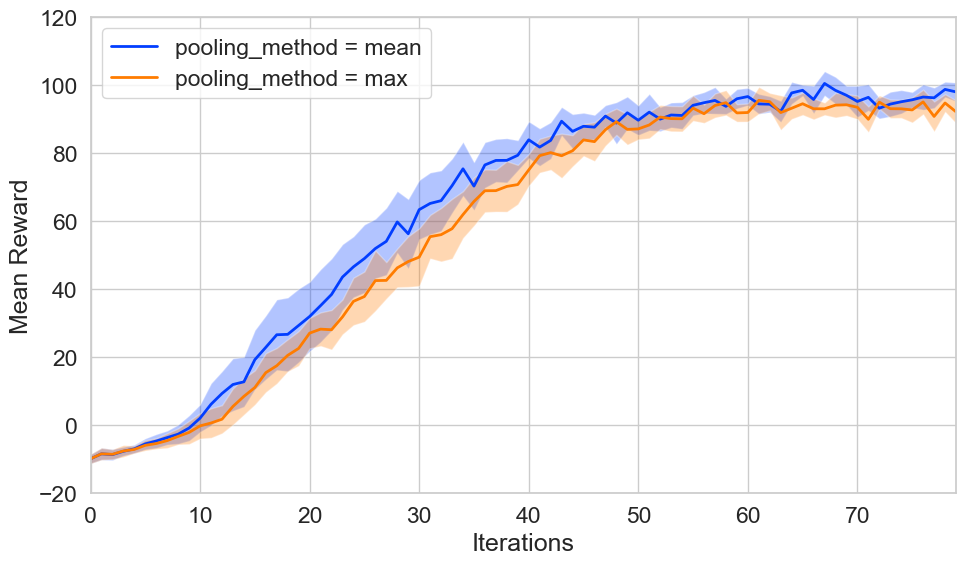

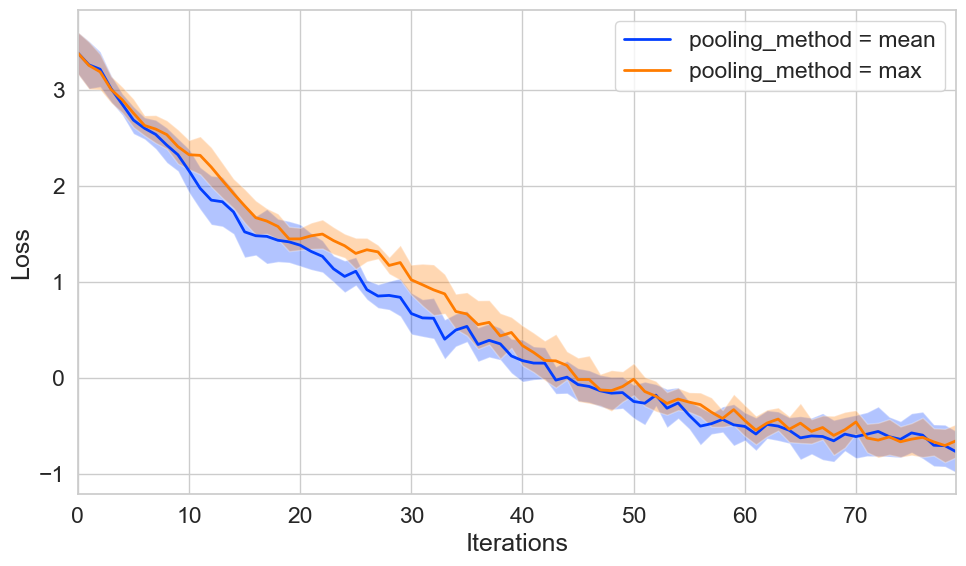

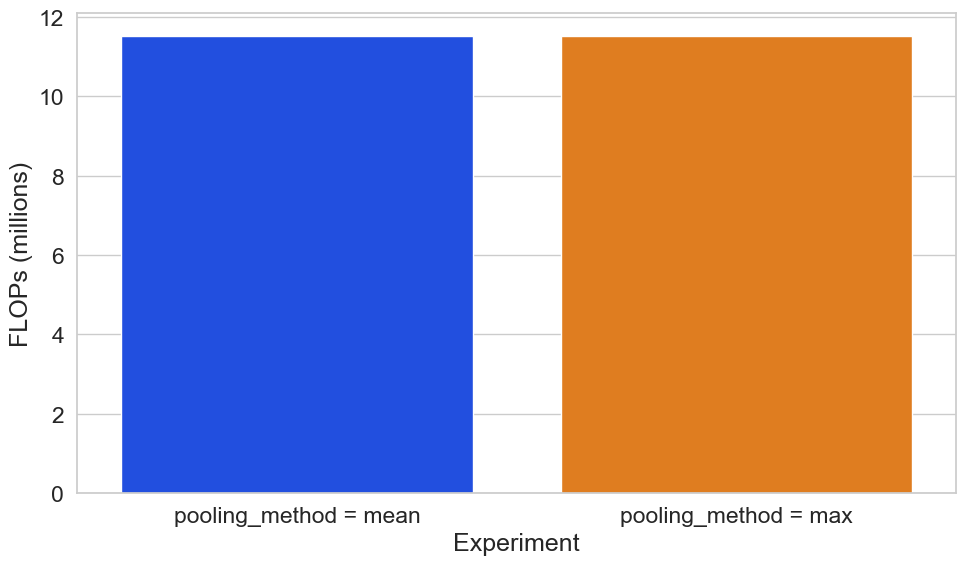

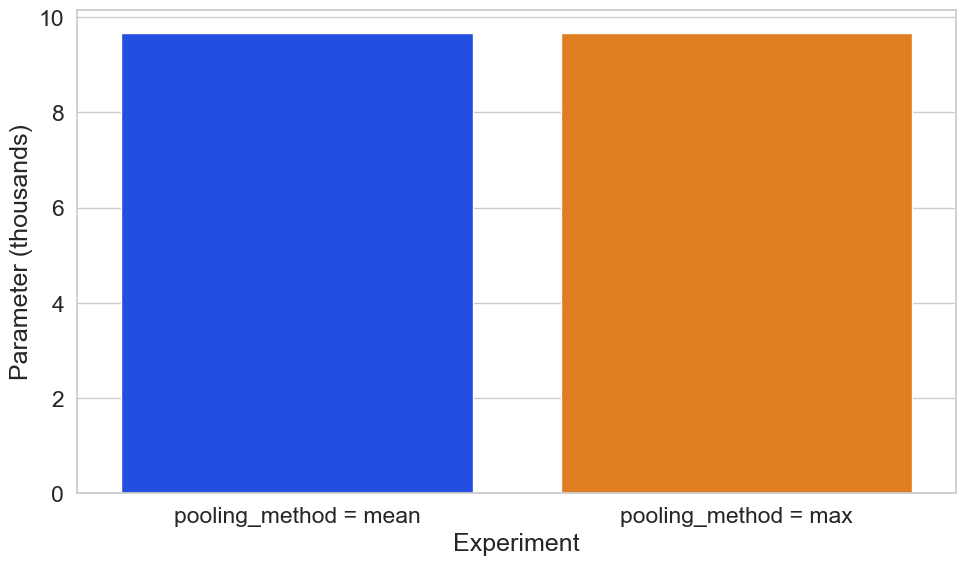

              Experiment training_time training_memory_usage  \
0  pooling_method = mean  55.17 ± 1.45    1690.87 ± 0.00e+00   
1   pooling_method = max  72.82 ± 0.34    2231.64 ± 0.00e+00   

        inference_time  mean_rewards          loss             flops  \
0  5.41e-04 ± 4.02e-05  97.98 ± 2.74  -0.77 ± 0.21  11.52 ± 0.00e+00   
1  5.37e-04 ± 2.42e-05  92.13 ± 3.33  -0.66 ± 0.17  11.52 ± 0.00e+00   

        parameters  
0  9.66 ± 0.00e+00  
1  9.66 ± 0.00e+00  


In [5]:
mean_vs_max(strategy=EmbeddingStrategy.GRAPH_SAGE, file_name='mean_v_max_gsage.csv')